In [ ]:
### Question 3:

In [ ]:
a. Measure the dispersion in both and interpret the results

In [4]:
import pandas as pd

In [9]:
data=pd.read_csv('data.csv')

In [10]:
data

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140
...,...,...,...
95,96,136,129
96,97,143,137
97,98,127,123
98,99,139,135


In [19]:
data.columns ##Let us find the names of the columns in the dataset

Index(['Patient ID', ' Blood Pressure Before (mmHg)',
       ' Blood Pressure After (mmHg)'],
      dtype='object')

In [17]:
### calculating the range of both the columns: ' Blood Pressure Before (mmHg)' and ' Blood Pressure After (mmHg)'
range_before = data[' Blood Pressure Before (mmHg)'].max()-data[' Blood Pressure Before (mmHg)'].min()
range_after = data[' Blood Pressure After (mmHg)'].max()-data[' Blood Pressure After (mmHg)'].min()

In [22]:
### calculating the variance of both the columns:
variance_before = data[' Blood Pressure Before (mmHg)'].var()
variance_after = data[' Blood Pressure After (mmHg)'].var()

In [25]:
### Calculating the standard deviation of both the columns:
std_before = data[' Blood Pressure Before (mmHg)'].std()
std_after = data[' Blood Pressure After (mmHg)'].std()

In [30]:
pd.DataFrame({'Blood Pressure Before (mmHg)':[range_before,variance_before,std_before],
              'Blood Pressure After (mmHg)':[range_after,variance_after,std_after]},index=['range','variance','standard_dev'])


,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
range,28.000000,23.000000
variance,43.537273,47.444848
standard_dev,6.598278,6.888022


#### 1. The range of 'Blood Pressure Before (mmHg)' is higher than the 'Blood Pressure After (mmHg)'
#### 2. From values of variance and the standard deviation, we can infer that 'Blood Pressure After' has greater spread or dispersion of values around the mean than the 'Blood Pressure Before' values.

In [ ]:
b. Calculate mean and 5% confidence interval and plot it in a graph

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [35]:
### Let us calculate mean of both the columns using np.mean()
mean_before=np.mean(data[' Blood Pressure Before (mmHg)'])
mean_after=np.mean(data[' Blood Pressure After (mmHg)'])

In [36]:
### Calculating the Confidence Interval of both the columns using the stats module
ci_before=stats.t.interval(0.95,len(data[' Blood Pressure Before (mmHg)'])-1,loc=mean_before,scale=stats.sem(data[' Blood Pressure Before (mmHg)']))
ci_before

(132.60075849172767, 135.21924150827232)

In [37]:
ci_after=stats.t.interval(0.95,len(data[' Blood Pressure After (mmHg)'])-1,loc=mean_after,scale=stats.sem(data[' Blood Pressure After (mmHg)']))
ci_after

(126.99326697818071, 129.7267330218193)

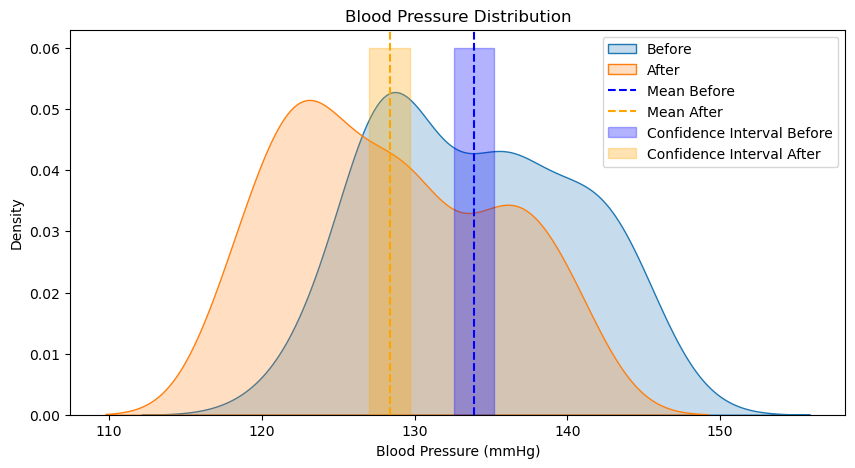

In [44]:
### Plotting both the column values along with their repective means and confidence intervals
plt.figure(figsize=(10, 5))
sns.kdeplot(data[' Blood Pressure Before (mmHg)'], fill=True, label='Before')
sns.kdeplot(data[' Blood Pressure After (mmHg)'], fill=True, label='After')
plt.axvline(x=mean_before, linestyle='--', color='blue', label='Mean Before')
plt.axvline(x=mean_after, linestyle='--', color='orange', label='Mean After')
plt.fill_betweenx([0,0.06],ci_before[0],ci_before[1],alpha=0.3,color='blue',label='Confidence Interval Before')
plt.fill_betweenx([0,0.06], ci_after[0],ci_after[1],alpha=0.3,color='orange',label='Confidence Interval After')
plt.title('Blood Pressure Distribution')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
c. Calculate the Mean absolute deviation and Standard deviation and interpret the results

In [47]:
### Let us calculate Mean absolute deviation of both the columns
mean_abs_dev_before = np.mean(np.abs(data[' Blood Pressure Before (mmHg)']-data[' Blood Pressure Before (mmHg)'].mean()))
mean_abs_dev_before

5.7118

In [48]:
mean_abs_dev_after = np.mean(np.abs(data[' Blood Pressure After (mmHg)']-data[' Blood Pressure After (mmHg)'].mean()))
mean_abs_dev_after

5.9

In [50]:
### Let us calculate standard deviation of both the columns
std_before = data[' Blood Pressure Before (mmHg)'].std()
std_before

6.598278012275075

In [49]:
std_after = data[' Blood Pressure After (mmHg)'].std()
std_after

6.8880221025232276

##### From the respective values of Mean absolute deviation and Standard deviation for both the columns 'Blood Pressure Before' and 'Blood Pressure After', it can be inferred that the 'Blood Pressure After' has greater spread around mean than the 'Blood Pressure Before'

In [ ]:
d. Calculate the correlation coefficient and check the significance of it at 1% level of significance.

In [61]:
from scipy.stats import pearsonr
correlation_coefficient, p_value = pearsonr(data[' Blood Pressure Before (mmHg)'],data[' Blood Pressure After (mmHg)'])

if p_value < 0.01:
    print('Significant')
else:
    print('Not Significant')

Significant


In [59]:
correlation_coefficient

0.9779485966556017

In [60]:
p_value

1.8097381433072956e-68

#### A high value of correlation coefficient (i.e either closer to 1 or -1) and a very low value of p-value indicates that there is a strong and statistically significant relationship between the two variables/columns